<a href="https://colab.research.google.com/github/drvdhruv/Creditcard-Fraud-detection/blob/main/Project2_2005453743_DhruvGadhiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-2: Credit Card Fraud Classification

In [ ]:
#importing all required libraries in here



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#importing metrics related libraries

from sklearn.metrics import confusion_matrix, classification_report

#data analysis libraries

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression

#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

#A/B hypothesis testing libraries

from scipy.stats import shapiro
from scipy import stats

#PyTorch

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import WeightedRandomSampler
from tqdm import tqdm


import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#importing the dataset as Pandas Dataframe from Excel Spreadsheet

df = pd.read_excel("CreditCardDataset.xlsx")

In [ ]:


df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [ ]:
#Checking for datatypes and variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

So, none of the variables in the dataset contain null values.
While the remaining variables are float types, Time and Class are integers.

Class is the target variable that represents fraud, using binary values to indicate if fraud occurred for the given datapoint.



In [ ]:
# Dimension of dataset

df.shape

(57355, 31)

This dataset contains 57355 rows and 31 columns

In [ ]:
# Descriptive analytics of dataset

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [ ]:
#  Time variable unique value printing

df.Time.unique()

array([     2,      7,     11, ..., 172768, 172770, 172777])

In [ ]:
df.groupby('Class').Class.agg('count')

Class
0    56863
1      492
Name: Class, dtype: int64

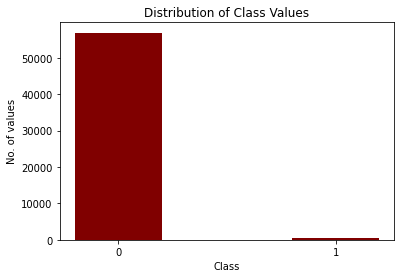

Class
0    56863
1      492
Name: Class, dtype: int64

In [ ]:
# Values in Class variable distribution

plt.bar(["0","1"],[df[(df.Class == 0)].Class.count(),df[(df.Class == 1)].Class.count()],color ='maroon',
        width = 0.4)
plt.xlabel("Class")
plt.ylabel("No. of values")
plt.title("Distribution of Class Values")
plt.show()

# Nunmer of values of each class

df.groupby('Class').Class.agg('count')

According to the distribution of class values shown above, the dataset is heavily skewed in favour of class 0.. <p>
    Class 0 ----> 56863<br>
    Class 1 ----> 492

[link text](https://)## Class and Amount variables relation

,count,min,median,mean,std,max
Class,,,,,,
0,56863,0.0,22.00,88.536709,279.670869,25691.16
1,492,0.0,9.25,122.211321,256.683288,2125.87


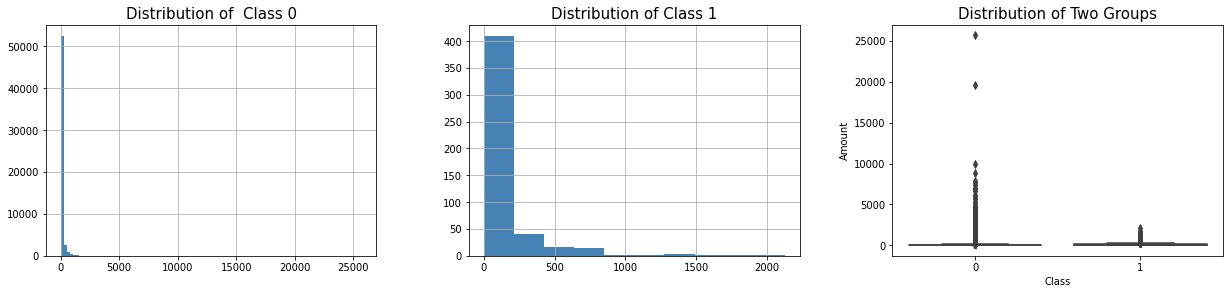

In [ ]:
# Comparing the class values with the amount variable to see the relationship using histogram and boxplot

fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.Class == 0)].hist("Amount", ax = axes[0], color = "steelblue",bins=100)
df[(df.Class == 1)].hist("Amount", ax = axes[1], color = "steelblue")
sns.boxplot(x = df.Class, y = df.Amount, ax = axes[2])

axes[0].set_title("Distribution of  Class 0", fontsize = 15)
axes[1].set_title("Distribution of Class 1", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

# Descriptive statistics of each class variables with respect to amount

df.groupby('Class').Amount.agg(["count", "min","median", "mean", "std","max"])

As can be observed, figures between 0 and 500 make up the majority of the distribution of the amount for which the fraud occurred.
Most fraudulent transactions involved smaller values..<br>
For Class 0 the distribution has some extreme values turning out to be outliers.

,count,min,median,mean,std,max
Class,,,,,,
0,56861,0.0,22.00,87.742305,244.858130,10000.00
1,492,0.0,9.25,122.211321,256.683288,2125.87


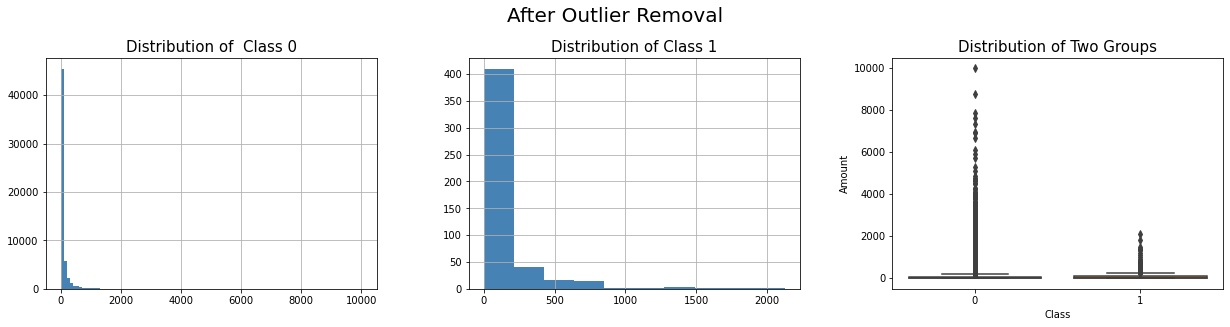

In [ ]:
# Using a histogram and boxplot to visualise the connection between the class values and the amount variable.

fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.Class == 0)].hist("Amount", ax = axes[0], color = "steelblue",bins=100)
df[(df.Class == 1)].hist("Amount", ax = axes[1], color = "steelblue")
sns.boxplot(x = df.Class, y = df.Amount, ax = axes[2])

axes[0].set_title("Distribution of  Class 0", fontsize = 15)
axes[1].set_title("Distribution of Class 1", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);
plt.suptitle("After Outlier Removal",size=20)

# Amount-related descriptive statistics for each type of variables

df.groupby('Class').Amount.agg(["count", "min","median", "mean", "std","max"])

## Relation between Class and Time variables

,count,min,median,mean,std,max
Class,,,,,,
0,56861,2,84687.0,94696.580908,47485.191203,172777
1,492,406,75568.5,80746.806911,47835.365138,170348


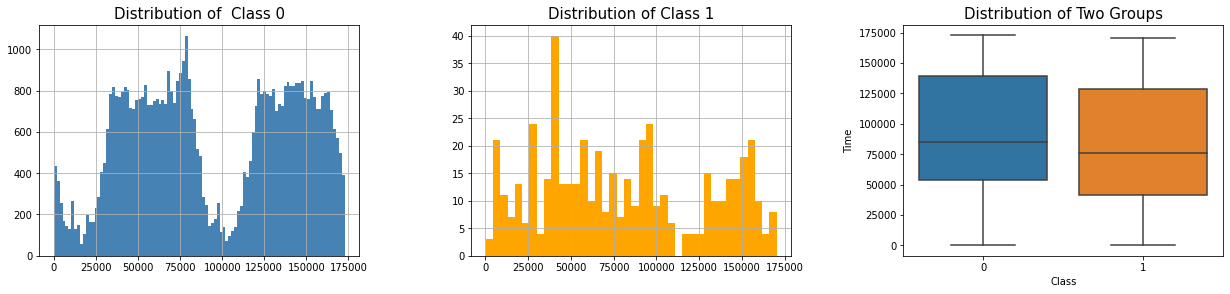

In [ ]:
# Using a histogram and boxplot to visualise the connection between the class values and the quantity variable


fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df.Class == 0)].hist("Time", ax = axes[0], color = "steelblue",bins=100)
df[(df.Class == 1)].hist("Time", ax = axes[1], color = "orange", bins=40)
sns.boxplot(x = df.Class, y = df.Time, ax = axes[2])

axes[0].set_title("Distribution of  Class 0", fontsize = 15)
axes[1].set_title("Distribution of Class 1", fontsize =15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

# Amount-related descriptive statistics for each type of variables

df.groupby('Class').Time.agg(["count", "min","median", "mean", "std","max"])

The descriptive statistics show that the two Classes 0 and 1 are comparable to one another.
One thing to keep in mind is that each Class value has a comparable Time distribution. As a result, the Class occurrence cannot be described using the Time variable since the patterns of distribution are not very interesting. <p>

We do not have any information about the 'V' variables. So Let's check for the mutual information between all the variables in the dataset.

In [ ]:
discrete_features = df.iloc[:,:-1].dtypes == int

def make_mi_scores(X, y,discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df.iloc[:,:-1], df.iloc[:,-1], discrete_features)
mi_scores  # show a few features with their MI scores

V14       0.034456
V17       0.033755
V10       0.031819
V12       0.031330
V11       0.028758
V16       0.025525
V3        0.022703
V4        0.022353
Time      0.019788
V7        0.019031
V9        0.018106
V18       0.018041
V2        0.014977
V21       0.011929
V27       0.011700
V6        0.011445
V5        0.011148
V1        0.009780
V8        0.009126
V28       0.008638
V19       0.007222
Amount    0.006352
V20       0.005564
V23       0.003384
V24       0.003037
V26       0.002481
V25       0.001962
V13       0.001761
V22       0.001659
V15       0.001405
Name: MI Scores, dtype: float64

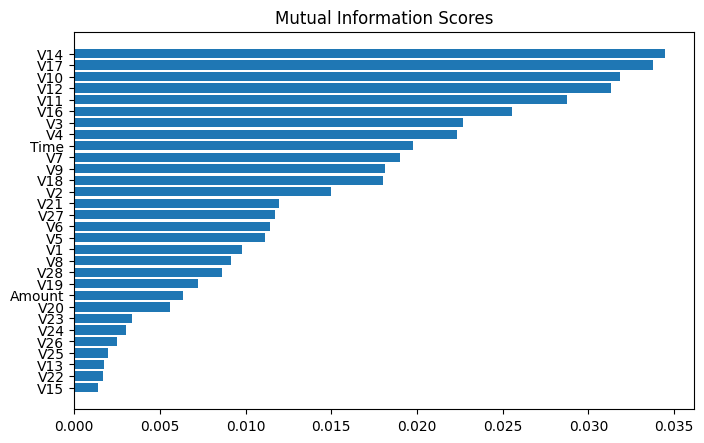

In [ ]:
# Let's create a bar graph to facilitate comparisons.

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

According to the mutual information scores, the 'V' variables are more useful for understanding the Class variables.

## A/B Testing
**Assumptions:**
- Check normality
- If Normal Distribution, check homogeneity

**Steps:**
- Split & Define Control Group & Test Group
- Apply Shapiro Test for normality
- If parametric apply Levene Test for homogeneity of variances
- If Parametric + homogeneity of variances apply T-Test
- If Parametric - homogeneity of variances apply Welch Test
- If Non-parametric apply Mann Whitney U Test directly

**Details about the dataset**
- Fraud or Not Fraud are the two classes for the class variables.
- When we contrast it with the value of the Amount variable, we can observe a crucial point
- Fraudulent transactions are limited to a narrow range. As a result,
- we must do A/B testing to determine how similar the classes are.

**Hypothesis**: The two classes 0 and 1 are similar to each other <br>
H0: Two Classes are similar<br>
H1: Two Classes are not similar



In [ ]:
# Define A/B groups

df["Class"] = np.where(df.Class == 0, "A", "B")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,A
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,A
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,A
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,A
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,A


In [ ]:
# Let's perform A/B testing on Class with respect to Amount

def AB_Test(dataframe, group, target):

    # Split the classes into A and B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True

    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True

        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1]
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True

    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05],
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]

    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    return temp



# Apply A/B Testing
AB_Test(dataframe=df, group = "Class", target = "Amount")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.000011,A/B groups are not similar!


Based on the test, we see that A/B groups are not similar to each other. It rejected our hypothesis. Now we will deal with the imbalance in the data

## Deal with Imbalanced data

In [ ]:
df["Class"] = np.where(df.Class == "A", 0, 1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [ ]:
# Assigning class distribution counts

def get_class_distribution(obj):
    count_dict = {
        0 : 0,
        1 : 0
    }

    for i in obj:
        if i == 0:
            count_dict[0] += 1
        elif i == 1:
            count_dict[1] += 1
        else:
            print("Check classes.")

    return count_dict

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [ ]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [ ]:
# Let's standardize the Input

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

## Define Custom Dataloaders

In [ ]:
class ClassifierDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

## Weight Sampling of Dataset

In [ ]:
# Weighting of Class

target_list = []
for _, t in train_dataset:
    target_list.append(t)

target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float)
print(class_weights)

class_weights_all = class_weights[target_list]

# Assign weight to each input sample

weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)


tensor([2.4427e-05, 2.8169e-03])


In [ ]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 2

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()

        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)

        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.layer_out(x)

        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
#gpu code
#model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

#gpu code
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=30, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)

    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)

    acc = torch.round(acc * 100)

    return acc

In [ ]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):

    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        # get the inputs
        X_train_batch, y_train_batch = X_train_batch, y_train_batch

        #gpu code
        #X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        train_loss.backward()
        optimizer.step()

        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()


    # VALIDATION
    with torch.no_grad():

        val_epoch_loss = 0
        val_epoch_acc = 0

        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            # get the inputs
            X_val_batch, y_val_batch = X_val_batch, y_val_batch

            #gpu code
            #X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

            y_val_pred = model(X_val_batch)

            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)

            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))

    # print statistics
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.


  0%|          | 1/300 [00:13<1:07:19, 13.51s/it]

Epoch 001: | Train Loss: 0.07310 | Val Loss: 0.02648 | Train Acc: 99.369| Val Acc: 99.216


  1%|          | 2/300 [00:23<57:36, 11.60s/it]  

Epoch 002: | Train Loss: 0.05684 | Val Loss: 0.04584 | Train Acc: 99.698| Val Acc: 98.758


  1%|          | 3/300 [00:35<57:49, 11.68s/it]

Epoch 003: | Train Loss: 0.06040 | Val Loss: 0.03262 | Train Acc: 99.670| Val Acc: 99.194


  1%|▏         | 4/300 [00:45<55:12, 11.19s/it]

Epoch 004: | Train Loss: 0.04697 | Val Loss: 0.01763 | Train Acc: 99.675| Val Acc: 99.695


  2%|▏         | 5/300 [01:04<1:08:06, 13.85s/it]

Epoch 005: | Train Loss: 0.04376 | Val Loss: 0.01491 | Train Acc: 99.747| Val Acc: 99.695


  2%|▏         | 6/300 [01:16<1:04:14, 13.11s/it]

Epoch 006: | Train Loss: 0.03319 | Val Loss: 0.01866 | Train Acc: 99.751| Val Acc: 99.542


  2%|▏         | 7/300 [01:31<1:08:14, 13.98s/it]

Epoch 007: | Train Loss: 0.03792 | Val Loss: 0.02210 | Train Acc: 99.647| Val Acc: 99.455


  3%|▎         | 8/300 [01:52<1:18:26, 16.12s/it]

Epoch 008: | Train Loss: 0.04669 | Val Loss: 0.01517 | Train Acc: 99.686| Val Acc: 99.651


  3%|▎         | 9/300 [02:06<1:14:47, 15.42s/it]

Epoch 009: | Train Loss: 0.03209 | Val Loss: 0.01657 | Train Acc: 99.677| Val Acc: 99.521


  3%|▎         | 10/300 [02:19<1:10:46, 14.64s/it]

Epoch 010: | Train Loss: 0.03336 | Val Loss: 0.01256 | Train Acc: 99.677| Val Acc: 99.739


  4%|▎         | 11/300 [02:32<1:08:10, 14.16s/it]

Epoch 011: | Train Loss: 0.03747 | Val Loss: 0.01652 | Train Acc: 99.784| Val Acc: 99.673


  4%|▍         | 12/300 [02:44<1:04:42, 13.48s/it]

Epoch 012: | Train Loss: 0.02649 | Val Loss: 0.01913 | Train Acc: 99.765| Val Acc: 99.521


  4%|▍         | 13/300 [02:56<1:02:58, 13.16s/it]

Epoch 013: | Train Loss: 0.03709 | Val Loss: 0.01326 | Train Acc: 99.714| Val Acc: 99.760


  5%|▍         | 14/300 [03:06<57:27, 12.05s/it]  

Epoch 014: | Train Loss: 0.02265 | Val Loss: 0.01738 | Train Acc: 99.772| Val Acc: 99.564


  5%|▌         | 15/300 [03:16<54:55, 11.56s/it]

Epoch 015: | Train Loss: 0.03617 | Val Loss: 0.01524 | Train Acc: 99.709| Val Acc: 99.695


  5%|▌         | 16/300 [03:28<54:28, 11.51s/it]

Epoch 016: | Train Loss: 0.02027 | Val Loss: 0.02741 | Train Acc: 99.805| Val Acc: 99.216


  6%|▌         | 17/300 [03:38<52:42, 11.18s/it]

Epoch 017: | Train Loss: 0.03301 | Val Loss: 0.01369 | Train Acc: 99.740| Val Acc: 99.608


  6%|▌         | 18/300 [03:50<52:54, 11.26s/it]

Epoch 018: | Train Loss: 0.02842 | Val Loss: 0.02881 | Train Acc: 99.809| Val Acc: 99.346


  6%|▋         | 19/300 [04:00<51:08, 10.92s/it]

Epoch 019: | Train Loss: 0.01964 | Val Loss: 0.01419 | Train Acc: 99.791| Val Acc: 99.542


  7%|▋         | 20/300 [04:09<49:21, 10.58s/it]

Epoch 020: | Train Loss: 0.03152 | Val Loss: 0.01750 | Train Acc: 99.677| Val Acc: 99.477


  7%|▋         | 21/300 [04:20<48:51, 10.51s/it]

Epoch 021: | Train Loss: 0.03123 | Val Loss: 0.02089 | Train Acc: 99.716| Val Acc: 99.390


  7%|▋         | 22/300 [04:30<48:48, 10.53s/it]

Epoch 022: | Train Loss: 0.01775 | Val Loss: 0.01887 | Train Acc: 99.833| Val Acc: 99.521


  8%|▊         | 23/300 [04:42<50:12, 10.88s/it]

Epoch 023: | Train Loss: 0.02898 | Val Loss: 0.02981 | Train Acc: 99.688| Val Acc: 99.085


  8%|▊         | 24/300 [04:53<49:54, 10.85s/it]

Epoch 024: | Train Loss: 0.02273 | Val Loss: 0.01394 | Train Acc: 99.691| Val Acc: 99.695


  8%|▊         | 25/300 [05:03<48:11, 10.52s/it]

Epoch 025: | Train Loss: 0.02150 | Val Loss: 0.01204 | Train Acc: 99.723| Val Acc: 99.717


  9%|▊         | 26/300 [05:13<47:57, 10.50s/it]

Epoch 026: | Train Loss: 0.02255 | Val Loss: 0.01465 | Train Acc: 99.785| Val Acc: 99.608


  9%|▉         | 27/300 [05:24<48:26, 10.64s/it]

Epoch 027: | Train Loss: 0.02412 | Val Loss: 0.01733 | Train Acc: 99.812| Val Acc: 99.564


  9%|▉         | 28/300 [05:36<50:01, 11.04s/it]

Epoch 028: | Train Loss: 0.02792 | Val Loss: 0.01791 | Train Acc: 99.763| Val Acc: 99.586


 10%|▉         | 29/300 [05:47<49:38, 10.99s/it]

Epoch 029: | Train Loss: 0.02078 | Val Loss: 0.01330 | Train Acc: 99.765| Val Acc: 99.630


 10%|█         | 30/300 [05:58<49:31, 11.01s/it]

Epoch 030: | Train Loss: 0.02383 | Val Loss: 0.01631 | Train Acc: 99.754| Val Acc: 99.521


 10%|█         | 31/300 [06:08<47:40, 10.63s/it]

Epoch 031: | Train Loss: 0.02293 | Val Loss: 0.01704 | Train Acc: 99.795| Val Acc: 99.455


 11%|█         | 32/300 [06:17<46:18, 10.37s/it]

Epoch 032: | Train Loss: 0.01894 | Val Loss: 0.01384 | Train Acc: 99.751| Val Acc: 99.739


 11%|█         | 33/300 [06:29<47:10, 10.60s/it]

Epoch 033: | Train Loss: 0.03207 | Val Loss: 0.02168 | Train Acc: 99.742| Val Acc: 99.455


 11%|█▏        | 34/300 [06:39<47:21, 10.68s/it]

Epoch 034: | Train Loss: 0.02526 | Val Loss: 0.01848 | Train Acc: 99.749| Val Acc: 99.542


 12%|█▏        | 35/300 [06:50<47:04, 10.66s/it]

Epoch 035: | Train Loss: 0.02228 | Val Loss: 0.02266 | Train Acc: 99.762| Val Acc: 99.368


 12%|█▏        | 36/300 [07:00<46:21, 10.54s/it]

Epoch 036: | Train Loss: 0.01390 | Val Loss: 0.04047 | Train Acc: 99.867| Val Acc: 98.518


 12%|█▏        | 37/300 [07:10<44:33, 10.17s/it]

Epoch 037: | Train Loss: 0.01959 | Val Loss: 0.01847 | Train Acc: 99.798| Val Acc: 99.651


 13%|█▎        | 38/300 [07:20<45:01, 10.31s/it]

Epoch 038: | Train Loss: 0.01444 | Val Loss: 0.01764 | Train Acc: 99.826| Val Acc: 99.695


 13%|█▎        | 39/300 [07:33<47:30, 10.92s/it]

Epoch 039: | Train Loss: 0.02025 | Val Loss: 0.01982 | Train Acc: 99.779| Val Acc: 99.542


 13%|█▎        | 40/300 [07:43<46:38, 10.76s/it]

Epoch 040: | Train Loss: 0.03447 | Val Loss: 0.01773 | Train Acc: 99.770| Val Acc: 99.521


 14%|█▎        | 41/300 [07:53<46:05, 10.68s/it]

Epoch 041: | Train Loss: 0.01973 | Val Loss: 0.01851 | Train Acc: 99.730| Val Acc: 99.564


 14%|█▍        | 42/300 [08:03<44:29, 10.35s/it]

Epoch 042: | Train Loss: 0.01561 | Val Loss: 0.02906 | Train Acc: 99.758| Val Acc: 99.259


 14%|█▍        | 43/300 [08:14<44:28, 10.38s/it]

Epoch 043: | Train Loss: 0.02444 | Val Loss: 0.01874 | Train Acc: 99.712| Val Acc: 99.433


 15%|█▍        | 44/300 [08:25<45:47, 10.73s/it]

Epoch 044: | Train Loss: 0.01721 | Val Loss: 0.02386 | Train Acc: 99.786| Val Acc: 99.433


 15%|█▌        | 45/300 [08:35<45:02, 10.60s/it]

Epoch 045: | Train Loss: 0.02175 | Val Loss: 0.03027 | Train Acc: 99.737| Val Acc: 98.845


 15%|█▌        | 46/300 [08:45<44:02, 10.40s/it]

Epoch 046: | Train Loss: 0.01122 | Val Loss: 0.01502 | Train Acc: 99.816| Val Acc: 99.717


 16%|█▌        | 47/300 [08:55<42:54, 10.18s/it]

Epoch 047: | Train Loss: 0.01533 | Val Loss: 0.02462 | Train Acc: 99.814| Val Acc: 99.455


 16%|█▌        | 48/300 [09:05<43:09, 10.28s/it]

Epoch 048: | Train Loss: 0.02519 | Val Loss: 0.01484 | Train Acc: 99.761| Val Acc: 99.695


 16%|█▋        | 49/300 [09:17<44:24, 10.61s/it]

Epoch 049: | Train Loss: 0.01970 | Val Loss: 0.01617 | Train Acc: 99.819| Val Acc: 99.630


 17%|█▋        | 50/300 [09:27<44:10, 10.60s/it]

Epoch 050: | Train Loss: 0.02844 | Val Loss: 0.01676 | Train Acc: 99.672| Val Acc: 99.564


 17%|█▋        | 51/300 [09:37<43:11, 10.41s/it]

Epoch 051: | Train Loss: 0.01777 | Val Loss: 0.02763 | Train Acc: 99.779| Val Acc: 99.172


 17%|█▋        | 52/300 [09:48<42:44, 10.34s/it]

Epoch 052: | Train Loss: 0.01033 | Val Loss: 0.02686 | Train Acc: 99.807| Val Acc: 99.281


 18%|█▊        | 53/300 [09:58<43:08, 10.48s/it]

Epoch 053: | Train Loss: 0.01858 | Val Loss: 0.02871 | Train Acc: 99.762| Val Acc: 99.324


 18%|█▊        | 54/300 [10:10<44:56, 10.96s/it]

Epoch 054: | Train Loss: 0.01621 | Val Loss: 0.01753 | Train Acc: 99.735| Val Acc: 99.695


 18%|█▊        | 55/300 [10:21<44:32, 10.91s/it]

Epoch 055: | Train Loss: 0.01232 | Val Loss: 0.02261 | Train Acc: 99.849| Val Acc: 99.630


 19%|█▊        | 56/300 [10:32<44:11, 10.87s/it]

Epoch 056: | Train Loss: 0.02611 | Val Loss: 0.02459 | Train Acc: 99.741| Val Acc: 99.303


 19%|█▉        | 57/300 [10:43<43:36, 10.77s/it]

Epoch 057: | Train Loss: 0.01557 | Val Loss: 0.01514 | Train Acc: 99.816| Val Acc: 99.717


 19%|█▉        | 58/300 [10:52<42:01, 10.42s/it]

Epoch 058: | Train Loss: 0.00917 | Val Loss: 0.01562 | Train Acc: 99.828| Val Acc: 99.651


 20%|█▉        | 59/300 [11:03<42:54, 10.68s/it]

Epoch 059: | Train Loss: 0.01776 | Val Loss: 0.01928 | Train Acc: 99.847| Val Acc: 99.717


 20%|██        | 60/300 [11:14<42:32, 10.63s/it]

Epoch 060: | Train Loss: 0.02248 | Val Loss: 0.04121 | Train Acc: 99.702| Val Acc: 98.496


 20%|██        | 61/300 [11:24<42:13, 10.60s/it]

Epoch 061: | Train Loss: 0.01212 | Val Loss: 0.02066 | Train Acc: 99.807| Val Acc: 99.673


 21%|██        | 62/300 [11:35<41:44, 10.52s/it]

Epoch 062: | Train Loss: 0.01445 | Val Loss: 0.01701 | Train Acc: 99.772| Val Acc: 99.542


 21%|██        | 63/300 [11:45<40:51, 10.34s/it]

Epoch 063: | Train Loss: 0.02492 | Val Loss: 0.01874 | Train Acc: 99.726| Val Acc: 99.608


 21%|██▏       | 64/300 [11:55<39:59, 10.17s/it]

Epoch 064: | Train Loss: 0.01014 | Val Loss: 0.02286 | Train Acc: 99.861| Val Acc: 99.412


 22%|██▏       | 65/300 [12:06<41:29, 10.60s/it]

Epoch 065: | Train Loss: 0.01623 | Val Loss: 0.01949 | Train Acc: 99.728| Val Acc: 99.608


 22%|██▏       | 66/300 [12:17<41:05, 10.54s/it]

Epoch 066: | Train Loss: 0.02587 | Val Loss: 0.02120 | Train Acc: 99.749| Val Acc: 99.651


 22%|██▏       | 67/300 [12:27<40:38, 10.47s/it]

Epoch 067: | Train Loss: 0.01223 | Val Loss: 0.04924 | Train Acc: 99.856| Val Acc: 98.387


 23%|██▎       | 68/300 [12:36<39:14, 10.15s/it]

Epoch 068: | Train Loss: 0.00973 | Val Loss: 0.02013 | Train Acc: 99.819| Val Acc: 99.717


 23%|██▎       | 69/300 [12:46<39:09, 10.17s/it]

Epoch 069: | Train Loss: 0.02116 | Val Loss: 0.01846 | Train Acc: 99.756| Val Acc: 99.608


 23%|██▎       | 70/300 [12:58<40:19, 10.52s/it]

Epoch 070: | Train Loss: 0.02101 | Val Loss: 0.01795 | Train Acc: 99.758| Val Acc: 99.630


 24%|██▎       | 71/300 [13:09<40:24, 10.59s/it]

Epoch 071: | Train Loss: 0.01266 | Val Loss: 0.02239 | Train Acc: 99.779| Val Acc: 99.477


 24%|██▍       | 72/300 [13:19<40:17, 10.60s/it]

Epoch 072: | Train Loss: 0.02347 | Val Loss: 0.15840 | Train Acc: 99.800| Val Acc: 93.681


 24%|██▍       | 73/300 [13:30<40:06, 10.60s/it]

Epoch 073: | Train Loss: 0.02067 | Val Loss: 0.01776 | Train Acc: 99.711| Val Acc: 99.477


 25%|██▍       | 74/300 [13:39<38:45, 10.29s/it]

Epoch 074: | Train Loss: 0.01813 | Val Loss: 0.01946 | Train Acc: 99.740| Val Acc: 99.390


 25%|██▌       | 75/300 [13:51<39:57, 10.66s/it]

Epoch 075: | Train Loss: 0.01306 | Val Loss: 0.01498 | Train Acc: 99.833| Val Acc: 99.651


 25%|██▌       | 76/300 [14:01<39:30, 10.58s/it]

Epoch 076: | Train Loss: 0.01757 | Val Loss: 0.01944 | Train Acc: 99.775| Val Acc: 99.499


 26%|██▌       | 77/300 [14:12<39:15, 10.56s/it]

Epoch 077: | Train Loss: 0.01589 | Val Loss: 0.02143 | Train Acc: 99.744| Val Acc: 99.368


 26%|██▌       | 78/300 [14:22<38:45, 10.48s/it]

Epoch 078: | Train Loss: 0.01502 | Val Loss: 0.01963 | Train Acc: 99.812| Val Acc: 99.564


 26%|██▋       | 79/300 [14:32<38:01, 10.32s/it]

Epoch 079: | Train Loss: 0.02510 | Val Loss: 0.02347 | Train Acc: 99.737| Val Acc: 99.324


 27%|██▋       | 80/300 [14:42<37:15, 10.16s/it]

Epoch 080: | Train Loss: 0.01500 | Val Loss: 0.01727 | Train Acc: 99.756| Val Acc: 99.695


 27%|██▋       | 81/300 [14:53<38:32, 10.56s/it]

Epoch 081: | Train Loss: 0.01345 | Val Loss: 0.01896 | Train Acc: 99.802| Val Acc: 99.608


 27%|██▋       | 82/300 [15:04<38:15, 10.53s/it]

Epoch 082: | Train Loss: 0.01843 | Val Loss: 0.02492 | Train Acc: 99.758| Val Acc: 99.433


 28%|██▊       | 83/300 [15:14<37:57, 10.50s/it]

Epoch 083: | Train Loss: 0.01607 | Val Loss: 0.02180 | Train Acc: 99.826| Val Acc: 99.521


 28%|██▊       | 84/300 [15:24<37:29, 10.41s/it]

Epoch 084: | Train Loss: 0.01335 | Val Loss: 0.02119 | Train Acc: 99.777| Val Acc: 99.390


 28%|██▊       | 85/300 [15:34<36:32, 10.20s/it]

Epoch 085: | Train Loss: 0.01386 | Val Loss: 0.02116 | Train Acc: 99.800| Val Acc: 99.542


 29%|██▊       | 86/300 [15:46<37:55, 10.64s/it]

Epoch 086: | Train Loss: 0.01307 | Val Loss: 0.02146 | Train Acc: 99.791| Val Acc: 99.695


 29%|██▉       | 87/300 [15:56<37:34, 10.58s/it]

Epoch 087: | Train Loss: 0.01737 | Val Loss: 0.02983 | Train Acc: 99.758| Val Acc: 99.346


 29%|██▉       | 88/300 [16:07<37:16, 10.55s/it]

Epoch 088: | Train Loss: 0.01395 | Val Loss: 0.02291 | Train Acc: 99.849| Val Acc: 99.564


 30%|██▉       | 89/300 [16:17<36:47, 10.46s/it]

Epoch 089: | Train Loss: 0.01350 | Val Loss: 0.01891 | Train Acc: 99.772| Val Acc: 99.651


 30%|███       | 90/300 [16:26<35:19, 10.09s/it]

Epoch 090: | Train Loss: 0.01365 | Val Loss: 0.02465 | Train Acc: 99.821| Val Acc: 99.521


 30%|███       | 91/300 [16:37<36:27, 10.47s/it]

Epoch 091: | Train Loss: 0.01301 | Val Loss: 0.02352 | Train Acc: 99.844| Val Acc: 99.673


 31%|███       | 92/300 [16:48<36:10, 10.44s/it]

Epoch 092: | Train Loss: 0.01760 | Val Loss: 0.01850 | Train Acc: 99.735| Val Acc: 99.739


 31%|███       | 93/300 [16:58<35:50, 10.39s/it]

Epoch 093: | Train Loss: 0.01429 | Val Loss: 0.02457 | Train Acc: 99.770| Val Acc: 99.368


 31%|███▏      | 94/300 [17:08<35:29, 10.34s/it]

Epoch 094: | Train Loss: 0.01082 | Val Loss: 0.02553 | Train Acc: 99.842| Val Acc: 99.564


 32%|███▏      | 95/300 [17:18<34:13, 10.02s/it]

Epoch 095: | Train Loss: 0.01094 | Val Loss: 0.01978 | Train Acc: 99.840| Val Acc: 99.739


 32%|███▏      | 96/300 [17:28<34:52, 10.26s/it]

Epoch 096: | Train Loss: 0.01995 | Val Loss: 0.01952 | Train Acc: 99.714| Val Acc: 99.717


 32%|███▏      | 97/300 [17:39<35:08, 10.39s/it]

Epoch 097: | Train Loss: 0.01507 | Val Loss: 0.02406 | Train Acc: 99.768| Val Acc: 99.695


 33%|███▎      | 98/300 [17:50<35:06, 10.43s/it]

Epoch 098: | Train Loss: 0.01234 | Val Loss: 0.02062 | Train Acc: 99.854| Val Acc: 99.630


 33%|███▎      | 99/300 [18:00<34:46, 10.38s/it]

Epoch 099: | Train Loss: 0.01377 | Val Loss: 0.01632 | Train Acc: 99.842| Val Acc: 99.717


 33%|███▎      | 100/300 [18:10<34:08, 10.24s/it]

Epoch 100: | Train Loss: 0.01697 | Val Loss: 0.03012 | Train Acc: 99.788| Val Acc: 98.910


 34%|███▎      | 101/300 [18:20<33:47, 10.19s/it]

Epoch 101: | Train Loss: 0.00759 | Val Loss: 0.02524 | Train Acc: 99.856| Val Acc: 99.433


 34%|███▍      | 102/300 [18:31<34:49, 10.55s/it]

Epoch 102: | Train Loss: 0.02012 | Val Loss: 0.02268 | Train Acc: 99.768| Val Acc: 99.564


 34%|███▍      | 103/300 [18:42<34:41, 10.56s/it]

Epoch 103: | Train Loss: 0.01249 | Val Loss: 0.02283 | Train Acc: 99.795| Val Acc: 99.433


 35%|███▍      | 104/300 [18:52<34:20, 10.51s/it]

Epoch 104: | Train Loss: 0.01299 | Val Loss: 0.02452 | Train Acc: 99.798| Val Acc: 99.586


 35%|███▌      | 105/300 [19:03<33:53, 10.43s/it]

Epoch 105: | Train Loss: 0.02000 | Val Loss: 0.02329 | Train Acc: 99.770| Val Acc: 99.564


 35%|███▌      | 106/300 [19:12<32:53, 10.17s/it]

Epoch 106: | Train Loss: 0.01256 | Val Loss: 0.02397 | Train Acc: 99.828| Val Acc: 99.542


 36%|███▌      | 107/300 [19:24<33:56, 10.55s/it]

Epoch 107: | Train Loss: 0.00968 | Val Loss: 0.03088 | Train Acc: 99.837| Val Acc: 99.455


 36%|███▌      | 108/300 [19:34<33:37, 10.51s/it]

Epoch 108: | Train Loss: 0.02141 | Val Loss: 0.02340 | Train Acc: 99.768| Val Acc: 99.586


 36%|███▋      | 109/300 [19:44<33:25, 10.50s/it]

Epoch 109: | Train Loss: 0.02171 | Val Loss: 0.02312 | Train Acc: 99.747| Val Acc: 99.499


 37%|███▋      | 110/300 [19:55<33:07, 10.46s/it]

Epoch 110: | Train Loss: 0.01908 | Val Loss: 0.03114 | Train Acc: 99.775| Val Acc: 99.150


 37%|███▋      | 111/300 [20:05<32:23, 10.28s/it]

Epoch 111: | Train Loss: 0.01105 | Val Loss: 0.02026 | Train Acc: 99.814| Val Acc: 99.717


 37%|███▋      | 112/300 [20:15<32:22, 10.33s/it]

Epoch 112: | Train Loss: 0.01300 | Val Loss: 0.02717 | Train Acc: 99.854| Val Acc: 99.324


 38%|███▊      | 113/300 [20:26<33:00, 10.59s/it]

Epoch 113: | Train Loss: 0.01967 | Val Loss: 0.01617 | Train Acc: 99.849| Val Acc: 99.630


 38%|███▊      | 114/300 [20:37<32:42, 10.55s/it]

Epoch 114: | Train Loss: 0.01653 | Val Loss: 0.03508 | Train Acc: 99.726| Val Acc: 99.216


 38%|███▊      | 115/300 [20:47<32:32, 10.56s/it]

Epoch 115: | Train Loss: 0.01025 | Val Loss: 0.01812 | Train Acc: 99.823| Val Acc: 99.651


 39%|███▊      | 116/300 [20:58<32:31, 10.60s/it]

Epoch 116: | Train Loss: 0.01785 | Val Loss: 0.02186 | Train Acc: 99.842| Val Acc: 99.216


 39%|███▉      | 117/300 [21:08<31:32, 10.34s/it]

Epoch 117: | Train Loss: 0.01546 | Val Loss: 0.02780 | Train Acc: 99.784| Val Acc: 99.281


 39%|███▉      | 118/300 [21:19<32:16, 10.64s/it]

Epoch 118: | Train Loss: 0.01754 | Val Loss: 0.02005 | Train Acc: 99.812| Val Acc: 99.586


 40%|███▉      | 119/300 [21:30<32:11, 10.67s/it]

Epoch 119: | Train Loss: 0.01663 | Val Loss: 0.02103 | Train Acc: 99.802| Val Acc: 99.673


 40%|████      | 120/300 [21:40<31:53, 10.63s/it]

Epoch 120: | Train Loss: 0.01470 | Val Loss: 0.02150 | Train Acc: 99.749| Val Acc: 99.608


 40%|████      | 121/300 [21:51<31:32, 10.57s/it]

Epoch 121: | Train Loss: 0.01496 | Val Loss: 0.01987 | Train Acc: 99.835| Val Acc: 99.433


 41%|████      | 122/300 [22:01<31:09, 10.50s/it]

Epoch 122: | Train Loss: 0.01371 | Val Loss: 0.02214 | Train Acc: 99.756| Val Acc: 99.542


 41%|████      | 123/300 [22:12<31:15, 10.60s/it]

Epoch 123: | Train Loss: 0.01154 | Val Loss: 0.03133 | Train Acc: 99.800| Val Acc: 99.542


 41%|████▏     | 124/300 [22:22<30:43, 10.47s/it]

Epoch 124: | Train Loss: 0.01949 | Val Loss: 0.02875 | Train Acc: 99.798| Val Acc: 99.128


 42%|████▏     | 125/300 [22:33<30:35, 10.49s/it]

Epoch 125: | Train Loss: 0.01132 | Val Loss: 0.03680 | Train Acc: 99.854| Val Acc: 99.303


 42%|████▏     | 126/300 [22:43<30:23, 10.48s/it]

Epoch 126: | Train Loss: 0.02056 | Val Loss: 0.03731 | Train Acc: 99.712| Val Acc: 99.542


 42%|████▏     | 127/300 [22:54<30:11, 10.47s/it]

Epoch 127: | Train Loss: 0.01358 | Val Loss: 0.05544 | Train Acc: 99.784| Val Acc: 99.128


 43%|████▎     | 128/300 [23:04<30:21, 10.59s/it]

Epoch 128: | Train Loss: 0.01578 | Val Loss: 0.05441 | Train Acc: 99.793| Val Acc: 98.736


 43%|████▎     | 129/300 [23:15<30:16, 10.62s/it]

Epoch 129: | Train Loss: 0.01265 | Val Loss: 0.02774 | Train Acc: 99.786| Val Acc: 99.412


 43%|████▎     | 130/300 [23:26<30:04, 10.62s/it]

Epoch 130: | Train Loss: 0.01730 | Val Loss: 0.02859 | Train Acc: 99.751| Val Acc: 99.303


 44%|████▎     | 131/300 [23:36<29:45, 10.57s/it]

Epoch 131: | Train Loss: 0.01153 | Val Loss: 0.02086 | Train Acc: 99.805| Val Acc: 99.717


 44%|████▍     | 132/300 [23:46<29:18, 10.47s/it]

Epoch 132: | Train Loss: 0.01728 | Val Loss: 0.02813 | Train Acc: 99.814| Val Acc: 99.455


 44%|████▍     | 133/300 [23:56<28:37, 10.28s/it]

Epoch 133: | Train Loss: 0.01364 | Val Loss: 0.03900 | Train Acc: 99.837| Val Acc: 99.107


 45%|████▍     | 134/300 [24:07<29:02, 10.50s/it]

Epoch 134: | Train Loss: 0.01723 | Val Loss: 0.04112 | Train Acc: 99.758| Val Acc: 99.303


 45%|████▌     | 135/300 [24:18<29:04, 10.57s/it]

Epoch 135: | Train Loss: 0.01706 | Val Loss: 0.03735 | Train Acc: 99.775| Val Acc: 99.324


 45%|████▌     | 136/300 [24:29<28:53, 10.57s/it]

Epoch 136: | Train Loss: 0.01563 | Val Loss: 0.03743 | Train Acc: 99.800| Val Acc: 99.455


 46%|████▌     | 137/300 [24:39<28:36, 10.53s/it]

Epoch 137: | Train Loss: 0.00851 | Val Loss: 0.03706 | Train Acc: 99.833| Val Acc: 99.651


 46%|████▌     | 138/300 [24:50<28:25, 10.53s/it]

Epoch 138: | Train Loss: 0.01795 | Val Loss: 0.02882 | Train Acc: 99.784| Val Acc: 99.499


 46%|████▋     | 139/300 [25:01<28:59, 10.81s/it]

Epoch 139: | Train Loss: 0.01367 | Val Loss: 0.03192 | Train Acc: 99.793| Val Acc: 99.412


 47%|████▋     | 140/300 [25:11<28:06, 10.54s/it]

Epoch 140: | Train Loss: 0.01122 | Val Loss: 0.02741 | Train Acc: 99.816| Val Acc: 99.630


 47%|████▋     | 141/300 [25:22<28:02, 10.58s/it]

Epoch 141: | Train Loss: 0.02347 | Val Loss: 0.03271 | Train Acc: 99.812| Val Acc: 99.651


 47%|████▋     | 142/300 [25:32<27:49, 10.56s/it]

Epoch 142: | Train Loss: 0.01586 | Val Loss: 0.03208 | Train Acc: 99.733| Val Acc: 99.521


 48%|████▊     | 143/300 [25:43<27:35, 10.54s/it]

Epoch 143: | Train Loss: 0.00661 | Val Loss: 0.03566 | Train Acc: 99.870| Val Acc: 99.542


 48%|████▊     | 144/300 [25:54<27:45, 10.68s/it]

Epoch 144: | Train Loss: 0.01560 | Val Loss: 0.03340 | Train Acc: 99.754| Val Acc: 99.237


 48%|████▊     | 145/300 [26:05<27:49, 10.77s/it]

Epoch 145: | Train Loss: 0.01171 | Val Loss: 0.03145 | Train Acc: 99.833| Val Acc: 99.499


 49%|████▊     | 146/300 [26:15<27:04, 10.55s/it]

Epoch 146: | Train Loss: 0.01897 | Val Loss: 0.03497 | Train Acc: 99.772| Val Acc: 99.564


 49%|████▉     | 147/300 [26:25<27:03, 10.61s/it]

Epoch 147: | Train Loss: 0.01633 | Val Loss: 0.02795 | Train Acc: 99.768| Val Acc: 99.542


 49%|████▉     | 148/300 [26:36<26:57, 10.64s/it]

Epoch 148: | Train Loss: 0.01202 | Val Loss: 0.03066 | Train Acc: 99.770| Val Acc: 99.608


 50%|████▉     | 149/300 [26:47<26:40, 10.60s/it]

Epoch 149: | Train Loss: 0.02046 | Val Loss: 0.02694 | Train Acc: 99.781| Val Acc: 99.368


 50%|█████     | 150/300 [26:58<27:22, 10.95s/it]

Epoch 150: | Train Loss: 0.01643 | Val Loss: 0.02890 | Train Acc: 99.747| Val Acc: 99.390


 50%|█████     | 151/300 [27:09<27:09, 10.94s/it]

Epoch 151: | Train Loss: 0.01072 | Val Loss: 0.03360 | Train Acc: 99.795| Val Acc: 99.303


 51%|█████     | 152/300 [27:19<26:18, 10.66s/it]

Epoch 152: | Train Loss: 0.01314 | Val Loss: 0.01740 | Train Acc: 99.800| Val Acc: 99.651


 51%|█████     | 153/300 [27:30<25:58, 10.60s/it]

Epoch 153: | Train Loss: 0.01514 | Val Loss: 0.02905 | Train Acc: 99.763| Val Acc: 99.216


 51%|█████▏    | 154/300 [27:40<25:52, 10.63s/it]

Epoch 154: | Train Loss: 0.01156 | Val Loss: 0.03281 | Train Acc: 99.819| Val Acc: 99.455


 52%|█████▏    | 155/300 [27:52<26:40, 11.04s/it]

Epoch 155: | Train Loss: 0.01864 | Val Loss: 0.02972 | Train Acc: 99.840| Val Acc: 99.477


 52%|█████▏    | 156/300 [28:03<26:09, 10.90s/it]

Epoch 156: | Train Loss: 0.01518 | Val Loss: 0.02926 | Train Acc: 99.784| Val Acc: 99.651


 52%|█████▏    | 157/300 [28:14<25:47, 10.82s/it]

Epoch 157: | Train Loss: 0.01740 | Val Loss: 0.03069 | Train Acc: 99.802| Val Acc: 99.477


 53%|█████▎    | 158/300 [28:24<24:58, 10.56s/it]

Epoch 158: | Train Loss: 0.01111 | Val Loss: 0.01722 | Train Acc: 99.844| Val Acc: 99.717


 53%|█████▎    | 159/300 [28:34<24:39, 10.49s/it]

Epoch 159: | Train Loss: 0.01693 | Val Loss: 0.02054 | Train Acc: 99.777| Val Acc: 99.651


 53%|█████▎    | 160/300 [28:45<25:10, 10.79s/it]

Epoch 160: | Train Loss: 0.01118 | Val Loss: 0.02834 | Train Acc: 99.833| Val Acc: 99.368


 54%|█████▎    | 161/300 [28:57<25:11, 10.88s/it]

Epoch 161: | Train Loss: 0.01443 | Val Loss: 0.03151 | Train Acc: 99.830| Val Acc: 99.107


 54%|█████▍    | 162/300 [29:07<25:00, 10.87s/it]

Epoch 162: | Train Loss: 0.01181 | Val Loss: 0.02759 | Train Acc: 99.805| Val Acc: 99.521


 54%|█████▍    | 163/300 [29:18<24:50, 10.88s/it]

Epoch 163: | Train Loss: 0.01656 | Val Loss: 0.02403 | Train Acc: 99.781| Val Acc: 99.586


 55%|█████▍    | 164/300 [29:29<24:21, 10.75s/it]

Epoch 164: | Train Loss: 0.01182 | Val Loss: 0.02690 | Train Acc: 99.828| Val Acc: 99.368


 55%|█████▌    | 165/300 [29:39<23:53, 10.62s/it]

Epoch 165: | Train Loss: 0.01622 | Val Loss: 0.02265 | Train Acc: 99.814| Val Acc: 99.651


 55%|█████▌    | 166/300 [29:51<24:30, 10.98s/it]

Epoch 166: | Train Loss: 0.01081 | Val Loss: 0.02589 | Train Acc: 99.851| Val Acc: 99.717


 56%|█████▌    | 167/300 [30:02<24:13, 10.93s/it]

Epoch 167: | Train Loss: 0.01530 | Val Loss: 0.02917 | Train Acc: 99.807| Val Acc: 99.608


 56%|█████▌    | 168/300 [30:12<23:58, 10.90s/it]

Epoch 168: | Train Loss: 0.01839 | Val Loss: 0.03555 | Train Acc: 99.779| Val Acc: 99.107


 56%|█████▋    | 169/300 [30:23<23:49, 10.91s/it]

Epoch 169: | Train Loss: 0.01313 | Val Loss: 0.02684 | Train Acc: 99.756| Val Acc: 99.499


 57%|█████▋    | 170/300 [30:34<23:31, 10.86s/it]

Epoch 170: | Train Loss: 0.01352 | Val Loss: 0.03913 | Train Acc: 99.763| Val Acc: 99.477


 57%|█████▋    | 171/300 [30:45<23:35, 10.97s/it]

Epoch 171: | Train Loss: 0.00850 | Val Loss: 0.02320 | Train Acc: 99.856| Val Acc: 99.564


 57%|█████▋    | 172/300 [30:56<23:26, 10.99s/it]

Epoch 172: | Train Loss: 0.00952 | Val Loss: 0.01953 | Train Acc: 99.835| Val Acc: 99.673


 58%|█████▊    | 173/300 [31:07<23:15, 10.99s/it]

Epoch 173: | Train Loss: 0.01785 | Val Loss: 0.02932 | Train Acc: 99.765| Val Acc: 99.216


 58%|█████▊    | 174/300 [31:18<23:05, 11.00s/it]

Epoch 174: | Train Loss: 0.01387 | Val Loss: 0.03567 | Train Acc: 99.884| Val Acc: 99.324


 58%|█████▊    | 175/300 [31:29<22:51, 10.97s/it]

Epoch 175: | Train Loss: 0.01293 | Val Loss: 0.02809 | Train Acc: 99.823| Val Acc: 99.259


 59%|█████▊    | 176/300 [31:41<23:15, 11.26s/it]

Epoch 176: | Train Loss: 0.01200 | Val Loss: 0.03105 | Train Acc: 99.775| Val Acc: 99.303


 59%|█████▉    | 177/300 [31:52<22:57, 11.20s/it]

Epoch 177: | Train Loss: 0.01356 | Val Loss: 0.02485 | Train Acc: 99.770| Val Acc: 99.542


 59%|█████▉    | 178/300 [32:03<22:16, 10.95s/it]

Epoch 178: | Train Loss: 0.01048 | Val Loss: 0.03105 | Train Acc: 99.792| Val Acc: 99.412


 60%|█████▉    | 179/300 [32:13<21:49, 10.82s/it]

Epoch 179: | Train Loss: 0.01008 | Val Loss: 0.02858 | Train Acc: 99.830| Val Acc: 99.542


 60%|██████    | 180/300 [32:24<21:44, 10.87s/it]

Epoch 180: | Train Loss: 0.01330 | Val Loss: 0.03450 | Train Acc: 99.791| Val Acc: 99.477


 60%|██████    | 181/300 [32:36<22:15, 11.22s/it]

Epoch 181: | Train Loss: 0.01029 | Val Loss: 0.03710 | Train Acc: 99.867| Val Acc: 99.608


 61%|██████    | 182/300 [32:47<22:02, 11.21s/it]

Epoch 182: | Train Loss: 0.01304 | Val Loss: 0.02934 | Train Acc: 99.768| Val Acc: 99.630


 61%|██████    | 183/300 [32:59<21:48, 11.19s/it]

Epoch 183: | Train Loss: 0.01097 | Val Loss: 0.02685 | Train Acc: 99.821| Val Acc: 99.630


 61%|██████▏   | 184/300 [33:10<21:34, 11.16s/it]

Epoch 184: | Train Loss: 0.01499 | Val Loss: 0.02173 | Train Acc: 99.786| Val Acc: 99.739


 62%|██████▏   | 185/300 [33:21<21:21, 11.14s/it]

Epoch 185: | Train Loss: 0.01129 | Val Loss: 0.02801 | Train Acc: 99.837| Val Acc: 99.717


 62%|██████▏   | 186/300 [33:33<21:30, 11.32s/it]

Epoch 186: | Train Loss: 0.02017 | Val Loss: 0.02952 | Train Acc: 99.802| Val Acc: 99.521


 62%|██████▏   | 187/300 [33:43<20:57, 11.13s/it]

Epoch 187: | Train Loss: 0.01184 | Val Loss: 0.02653 | Train Acc: 99.837| Val Acc: 99.630


 63%|██████▎   | 188/300 [33:55<21:00, 11.25s/it]

Epoch 188: | Train Loss: 0.01086 | Val Loss: 0.02824 | Train Acc: 99.858| Val Acc: 99.739


 63%|██████▎   | 189/300 [34:06<20:56, 11.32s/it]

Epoch 189: | Train Loss: 0.00935 | Val Loss: 0.02914 | Train Acc: 99.874| Val Acc: 99.172


 63%|██████▎   | 190/300 [34:18<20:47, 11.34s/it]

Epoch 190: | Train Loss: 0.02857 | Val Loss: 0.05044 | Train Acc: 99.730| Val Acc: 98.387


 64%|██████▎   | 191/300 [34:30<21:23, 11.77s/it]

Epoch 191: | Train Loss: 0.01232 | Val Loss: 0.02437 | Train Acc: 99.768| Val Acc: 99.739


 64%|██████▍   | 192/300 [34:42<21:10, 11.76s/it]

Epoch 192: | Train Loss: 0.01471 | Val Loss: 0.02982 | Train Acc: 99.713| Val Acc: 99.455


 64%|██████▍   | 193/300 [34:53<20:43, 11.63s/it]

Epoch 193: | Train Loss: 0.01490 | Val Loss: 0.02359 | Train Acc: 99.768| Val Acc: 99.695


 65%|██████▍   | 194/300 [35:05<20:23, 11.54s/it]

Epoch 194: | Train Loss: 0.01107 | Val Loss: 0.02770 | Train Acc: 99.872| Val Acc: 99.695


 65%|██████▌   | 195/300 [35:15<19:46, 11.30s/it]

Epoch 195: | Train Loss: 0.01880 | Val Loss: 0.02794 | Train Acc: 99.763| Val Acc: 99.608


 65%|██████▌   | 196/300 [35:28<20:00, 11.55s/it]

Epoch 196: | Train Loss: 0.01703 | Val Loss: 0.03051 | Train Acc: 99.795| Val Acc: 99.390


 66%|██████▌   | 197/300 [35:39<19:38, 11.45s/it]

Epoch 197: | Train Loss: 0.01371 | Val Loss: 0.03147 | Train Acc: 99.856| Val Acc: 99.695


 66%|██████▌   | 198/300 [35:50<19:26, 11.44s/it]

Epoch 198: | Train Loss: 0.01092 | Val Loss: 0.02392 | Train Acc: 99.849| Val Acc: 99.739


 66%|██████▋   | 199/300 [36:01<19:07, 11.36s/it]

Epoch 199: | Train Loss: 0.01360 | Val Loss: 0.03256 | Train Acc: 99.837| Val Acc: 99.651


 67%|██████▋   | 200/300 [36:13<18:58, 11.39s/it]

Epoch 200: | Train Loss: 0.01883 | Val Loss: 0.03271 | Train Acc: 99.791| Val Acc: 99.390


 67%|██████▋   | 201/300 [36:25<19:18, 11.70s/it]

Epoch 201: | Train Loss: 0.01084 | Val Loss: 0.03597 | Train Acc: 99.812| Val Acc: 99.608


 67%|██████▋   | 202/300 [36:37<19:02, 11.66s/it]

Epoch 202: | Train Loss: 0.01546 | Val Loss: 0.04336 | Train Acc: 99.784| Val Acc: 99.346


 68%|██████▊   | 203/300 [36:49<18:50, 11.66s/it]

Epoch 203: | Train Loss: 0.01293 | Val Loss: 0.04154 | Train Acc: 99.779| Val Acc: 99.128


 68%|██████▊   | 204/300 [37:00<18:37, 11.64s/it]

Epoch 204: | Train Loss: 0.00956 | Val Loss: 0.04081 | Train Acc: 99.828| Val Acc: 99.542


 68%|██████▊   | 205/300 [37:12<18:19, 11.57s/it]

Epoch 205: | Train Loss: 0.01532 | Val Loss: 0.04936 | Train Acc: 99.833| Val Acc: 99.412


 69%|██████▊   | 206/300 [37:24<18:30, 11.81s/it]

Epoch 206: | Train Loss: 0.00750 | Val Loss: 0.02953 | Train Acc: 99.854| Val Acc: 99.739


 69%|██████▉   | 207/300 [37:35<17:53, 11.55s/it]

Epoch 207: | Train Loss: 0.01081 | Val Loss: 0.02714 | Train Acc: 99.833| Val Acc: 99.412


 69%|██████▉   | 208/300 [37:46<17:44, 11.57s/it]

Epoch 208: | Train Loss: 0.01358 | Val Loss: 0.02780 | Train Acc: 99.765| Val Acc: 99.651


 70%|██████▉   | 209/300 [37:58<17:42, 11.67s/it]

Epoch 209: | Train Loss: 0.00970 | Val Loss: 0.03560 | Train Acc: 99.835| Val Acc: 99.172


 70%|███████   | 210/300 [38:10<17:27, 11.64s/it]

Epoch 210: | Train Loss: 0.01153 | Val Loss: 0.02883 | Train Acc: 99.798| Val Acc: 99.521


 70%|███████   | 211/300 [38:22<17:35, 11.86s/it]

Epoch 211: | Train Loss: 0.02130 | Val Loss: 0.02543 | Train Acc: 99.786| Val Acc: 99.630


 71%|███████   | 212/300 [38:34<17:25, 11.88s/it]

Epoch 212: | Train Loss: 0.01039 | Val Loss: 0.03038 | Train Acc: 99.858| Val Acc: 99.433


 71%|███████   | 213/300 [38:46<17:10, 11.84s/it]

Epoch 213: | Train Loss: 0.01592 | Val Loss: 0.03871 | Train Acc: 99.728| Val Acc: 99.521


 71%|███████▏  | 214/300 [38:58<16:57, 11.83s/it]

Epoch 214: | Train Loss: 0.01003 | Val Loss: 0.02692 | Train Acc: 99.840| Val Acc: 99.412


 72%|███████▏  | 215/300 [39:11<17:11, 12.14s/it]

Epoch 215: | Train Loss: 0.01690 | Val Loss: 0.02212 | Train Acc: 99.830| Val Acc: 99.630


 72%|███████▏  | 216/300 [39:22<16:51, 12.04s/it]

Epoch 216: | Train Loss: 0.00809 | Val Loss: 0.02262 | Train Acc: 99.900| Val Acc: 99.760


 72%|███████▏  | 217/300 [39:34<16:34, 11.99s/it]

Epoch 217: | Train Loss: 0.01661 | Val Loss: 0.02287 | Train Acc: 99.840| Val Acc: 99.630


 73%|███████▎  | 218/300 [39:46<16:19, 11.94s/it]

Epoch 218: | Train Loss: 0.00938 | Val Loss: 0.02306 | Train Acc: 99.863| Val Acc: 99.542


 73%|███████▎  | 219/300 [39:58<16:04, 11.91s/it]

Epoch 219: | Train Loss: 0.02784 | Val Loss: 0.02174 | Train Acc: 99.793| Val Acc: 99.630


 73%|███████▎  | 220/300 [40:11<16:13, 12.17s/it]

Epoch 220: | Train Loss: 0.01151 | Val Loss: 0.02764 | Train Acc: 99.841| Val Acc: 99.346


 74%|███████▎  | 221/300 [40:22<15:51, 12.04s/it]

Epoch 221: | Train Loss: 0.00914 | Val Loss: 0.02229 | Train Acc: 99.865| Val Acc: 99.433


 74%|███████▍  | 222/300 [40:34<15:28, 11.90s/it]

Epoch 222: | Train Loss: 0.00783 | Val Loss: 0.02134 | Train Acc: 99.854| Val Acc: 99.499


 74%|███████▍  | 223/300 [40:46<15:08, 11.80s/it]

Epoch 223: | Train Loss: 0.01126 | Val Loss: 0.02901 | Train Acc: 99.858| Val Acc: 99.521


 75%|███████▍  | 224/300 [40:57<14:57, 11.81s/it]

Epoch 224: | Train Loss: 0.01730 | Val Loss: 0.02146 | Train Acc: 99.847| Val Acc: 99.608


 75%|███████▌  | 225/300 [41:11<15:13, 12.18s/it]

Epoch 225: | Train Loss: 0.01952 | Val Loss: 0.01999 | Train Acc: 99.756| Val Acc: 99.651


 75%|███████▌  | 226/300 [41:22<14:55, 12.10s/it]

Epoch 226: | Train Loss: 0.00760 | Val Loss: 0.02415 | Train Acc: 99.847| Val Acc: 99.739


 76%|███████▌  | 227/300 [41:35<14:46, 12.15s/it]

Epoch 227: | Train Loss: 0.00990 | Val Loss: 0.02792 | Train Acc: 99.837| Val Acc: 99.804


 76%|███████▌  | 228/300 [41:47<14:34, 12.14s/it]

Epoch 228: | Train Loss: 0.00609 | Val Loss: 0.02481 | Train Acc: 99.879| Val Acc: 99.760


 76%|███████▋  | 229/300 [41:59<14:21, 12.14s/it]

Epoch 229: | Train Loss: 0.01867 | Val Loss: 0.02768 | Train Acc: 99.740| Val Acc: 99.717


 77%|███████▋  | 230/300 [42:12<14:34, 12.49s/it]

Epoch 230: | Train Loss: 0.01223 | Val Loss: 0.02700 | Train Acc: 99.874| Val Acc: 99.433


 77%|███████▋  | 231/300 [42:25<14:18, 12.44s/it]

Epoch 231: | Train Loss: 0.01196 | Val Loss: 0.02872 | Train Acc: 99.826| Val Acc: 99.717


 77%|███████▋  | 232/300 [42:37<14:02, 12.39s/it]

Epoch 232: | Train Loss: 0.00730 | Val Loss: 0.02874 | Train Acc: 99.886| Val Acc: 99.346


 78%|███████▊  | 233/300 [42:49<13:49, 12.38s/it]

Epoch 233: | Train Loss: 0.01500 | Val Loss: 0.04060 | Train Acc: 99.807| Val Acc: 99.259


 78%|███████▊  | 234/300 [43:02<13:55, 12.65s/it]

Epoch 234: | Train Loss: 0.01737 | Val Loss: 0.03028 | Train Acc: 99.702| Val Acc: 99.521


 78%|███████▊  | 235/300 [43:15<13:42, 12.65s/it]

Epoch 235: | Train Loss: 0.01631 | Val Loss: 0.02790 | Train Acc: 99.756| Val Acc: 99.259


 79%|███████▊  | 236/300 [43:28<13:29, 12.65s/it]

Epoch 236: | Train Loss: 0.01017 | Val Loss: 0.02148 | Train Acc: 99.823| Val Acc: 99.542


 79%|███████▉  | 237/300 [43:40<13:10, 12.56s/it]

Epoch 237: | Train Loss: 0.01429 | Val Loss: 0.02127 | Train Acc: 99.757| Val Acc: 99.673


 79%|███████▉  | 238/300 [43:53<13:00, 12.58s/it]

Epoch 238: | Train Loss: 0.01235 | Val Loss: 0.01946 | Train Acc: 99.816| Val Acc: 99.651


 80%|███████▉  | 239/300 [44:07<13:08, 12.93s/it]

Epoch 239: | Train Loss: 0.01396 | Val Loss: 0.02158 | Train Acc: 99.837| Val Acc: 99.608


 80%|████████  | 240/300 [44:19<12:49, 12.82s/it]

Epoch 240: | Train Loss: 0.01093 | Val Loss: 0.02842 | Train Acc: 99.835| Val Acc: 99.499


 80%|████████  | 241/300 [44:32<12:31, 12.74s/it]

Epoch 241: | Train Loss: 0.01586 | Val Loss: 0.02421 | Train Acc: 99.700| Val Acc: 99.499


 81%|████████  | 242/300 [44:44<12:19, 12.74s/it]

Epoch 242: | Train Loss: 0.00627 | Val Loss: 0.02710 | Train Acc: 99.900| Val Acc: 99.695


 81%|████████  | 243/300 [44:58<12:16, 12.91s/it]

Epoch 243: | Train Loss: 0.00815 | Val Loss: 0.02718 | Train Acc: 99.867| Val Acc: 99.695


 81%|████████▏ | 244/300 [45:10<12:00, 12.87s/it]

Epoch 244: | Train Loss: 0.01280 | Val Loss: 0.02353 | Train Acc: 99.846| Val Acc: 99.651


 82%|████████▏ | 245/300 [45:23<11:44, 12.80s/it]

Epoch 245: | Train Loss: 0.00908 | Val Loss: 0.02744 | Train Acc: 99.879| Val Acc: 99.651


 82%|████████▏ | 246/300 [45:36<11:29, 12.77s/it]

Epoch 246: | Train Loss: 0.01211 | Val Loss: 0.02326 | Train Acc: 99.816| Val Acc: 99.717


 82%|████████▏ | 247/300 [45:48<11:13, 12.71s/it]

Epoch 247: | Train Loss: 0.02309 | Val Loss: 0.02532 | Train Acc: 99.747| Val Acc: 99.586


 83%|████████▎ | 248/300 [46:02<11:18, 13.05s/it]

Epoch 248: | Train Loss: 0.01007 | Val Loss: 0.02676 | Train Acc: 99.828| Val Acc: 99.564


 83%|████████▎ | 249/300 [46:15<11:02, 12.99s/it]

Epoch 249: | Train Loss: 0.00995 | Val Loss: 0.02479 | Train Acc: 99.809| Val Acc: 99.717


 83%|████████▎ | 250/300 [46:28<10:44, 12.88s/it]

Epoch 250: | Train Loss: 0.00973 | Val Loss: 0.02689 | Train Acc: 99.879| Val Acc: 99.695


 84%|████████▎ | 251/300 [46:40<10:28, 12.82s/it]

Epoch 251: | Train Loss: 0.00889 | Val Loss: 0.03245 | Train Acc: 99.888| Val Acc: 99.586


 84%|████████▍ | 252/300 [46:54<10:25, 13.03s/it]

Epoch 252: | Train Loss: 0.01741 | Val Loss: 0.02891 | Train Acc: 99.784| Val Acc: 99.499


 84%|████████▍ | 253/300 [47:07<10:08, 12.94s/it]

Epoch 253: | Train Loss: 0.00807 | Val Loss: 0.01822 | Train Acc: 99.861| Val Acc: 99.760


 85%|████████▍ | 254/300 [47:19<09:52, 12.89s/it]

Epoch 254: | Train Loss: 0.01705 | Val Loss: 0.02795 | Train Acc: 99.795| Val Acc: 99.499


 85%|████████▌ | 255/300 [47:32<09:39, 12.88s/it]

Epoch 255: | Train Loss: 0.01109 | Val Loss: 0.03105 | Train Acc: 99.847| Val Acc: 99.673


 85%|████████▌ | 256/300 [47:45<09:27, 12.89s/it]

Epoch 256: | Train Loss: 0.01078 | Val Loss: 0.02090 | Train Acc: 99.828| Val Acc: 99.564


 86%|████████▌ | 257/300 [47:59<09:29, 13.24s/it]

Epoch 257: | Train Loss: 0.01133 | Val Loss: 0.02524 | Train Acc: 99.863| Val Acc: 99.542


 86%|████████▌ | 258/300 [48:12<09:10, 13.10s/it]

Epoch 258: | Train Loss: 0.01514 | Val Loss: 0.01955 | Train Acc: 99.826| Val Acc: 99.542


 86%|████████▋ | 259/300 [48:25<08:53, 13.01s/it]

Epoch 259: | Train Loss: 0.01874 | Val Loss: 0.02435 | Train Acc: 99.844| Val Acc: 99.630


 87%|████████▋ | 260/300 [48:38<08:38, 12.95s/it]

Epoch 260: | Train Loss: 0.01596 | Val Loss: 0.02457 | Train Acc: 99.819| Val Acc: 99.433


 87%|████████▋ | 261/300 [48:51<08:35, 13.22s/it]

Epoch 261: | Train Loss: 0.00715 | Val Loss: 0.01687 | Train Acc: 99.872| Val Acc: 99.760


 87%|████████▋ | 262/300 [49:05<08:20, 13.17s/it]

Epoch 262: | Train Loss: 0.01399 | Val Loss: 0.02306 | Train Acc: 99.798| Val Acc: 99.739


 88%|████████▊ | 263/300 [49:18<08:07, 13.19s/it]

Epoch 263: | Train Loss: 0.01281 | Val Loss: 0.02182 | Train Acc: 99.800| Val Acc: 99.651


 88%|████████▊ | 264/300 [49:31<07:54, 13.19s/it]

Epoch 264: | Train Loss: 0.00730 | Val Loss: 0.03078 | Train Acc: 99.861| Val Acc: 99.695


 88%|████████▊ | 265/300 [49:45<07:54, 13.57s/it]

Epoch 265: | Train Loss: 0.00882 | Val Loss: 0.02819 | Train Acc: 99.893| Val Acc: 99.782


 89%|████████▊ | 266/300 [49:59<07:38, 13.49s/it]

Epoch 266: | Train Loss: 0.00966 | Val Loss: 0.02782 | Train Acc: 99.858| Val Acc: 99.695


 89%|████████▉ | 267/300 [50:12<07:23, 13.43s/it]

Epoch 267: | Train Loss: 0.01338 | Val Loss: 0.03567 | Train Acc: 99.851| Val Acc: 99.651


 89%|████████▉ | 268/300 [50:25<07:05, 13.28s/it]

Epoch 268: | Train Loss: 0.01061 | Val Loss: 0.03422 | Train Acc: 99.900| Val Acc: 99.651


 90%|████████▉ | 269/300 [50:38<06:50, 13.24s/it]

Epoch 269: | Train Loss: 0.01176 | Val Loss: 0.02552 | Train Acc: 99.874| Val Acc: 99.521


 90%|█████████ | 270/300 [50:52<06:41, 13.39s/it]

Epoch 270: | Train Loss: 0.01717 | Val Loss: 0.03803 | Train Acc: 99.891| Val Acc: 98.910


 90%|█████████ | 271/300 [51:05<06:27, 13.36s/it]

Epoch 271: | Train Loss: 0.01696 | Val Loss: 0.02770 | Train Acc: 99.784| Val Acc: 99.499


 91%|█████████ | 272/300 [51:18<06:12, 13.32s/it]

Epoch 272: | Train Loss: 0.01132 | Val Loss: 0.02655 | Train Acc: 99.828| Val Acc: 99.673


 91%|█████████ | 273/300 [51:31<05:58, 13.28s/it]

Epoch 273: | Train Loss: 0.01767 | Val Loss: 0.03291 | Train Acc: 99.781| Val Acc: 99.172


 91%|█████████▏| 274/300 [51:46<05:53, 13.58s/it]

Epoch 274: | Train Loss: 0.01115 | Val Loss: 0.03171 | Train Acc: 99.814| Val Acc: 99.717


 92%|█████████▏| 275/300 [51:59<05:36, 13.45s/it]

Epoch 275: | Train Loss: 0.01230 | Val Loss: 0.02824 | Train Acc: 99.851| Val Acc: 99.412


 92%|█████████▏| 276/300 [52:12<05:21, 13.38s/it]

Epoch 276: | Train Loss: 0.01286 | Val Loss: 0.02663 | Train Acc: 99.800| Val Acc: 99.630


 92%|█████████▏| 277/300 [52:26<05:07, 13.39s/it]

Epoch 277: | Train Loss: 0.01266 | Val Loss: 0.02956 | Train Acc: 99.742| Val Acc: 99.651


 93%|█████████▎| 278/300 [52:40<04:59, 13.63s/it]

Epoch 278: | Train Loss: 0.01058 | Val Loss: 0.03718 | Train Acc: 99.805| Val Acc: 99.564


 93%|█████████▎| 279/300 [52:53<04:43, 13.52s/it]

Epoch 279: | Train Loss: 0.00890 | Val Loss: 0.05410 | Train Acc: 99.849| Val Acc: 99.455


 93%|█████████▎| 280/300 [53:07<04:31, 13.58s/it]

Epoch 280: | Train Loss: 0.01827 | Val Loss: 0.02430 | Train Acc: 99.828| Val Acc: 99.608


 94%|█████████▎| 281/300 [53:20<04:16, 13.52s/it]

Epoch 281: | Train Loss: 0.01385 | Val Loss: 0.03819 | Train Acc: 99.823| Val Acc: 99.433


 94%|█████████▍| 282/300 [53:34<04:03, 13.55s/it]

Epoch 282: | Train Loss: 0.01034 | Val Loss: 0.02881 | Train Acc: 99.840| Val Acc: 99.542


 94%|█████████▍| 283/300 [53:48<03:55, 13.87s/it]

Epoch 283: | Train Loss: 0.01812 | Val Loss: 0.03753 | Train Acc: 99.795| Val Acc: 99.041


 95%|█████████▍| 284/300 [54:02<03:41, 13.87s/it]

Epoch 284: | Train Loss: 0.01370 | Val Loss: 0.03868 | Train Acc: 99.823| Val Acc: 99.499


 95%|█████████▌| 285/300 [54:16<03:26, 13.78s/it]

Epoch 285: | Train Loss: 0.01215 | Val Loss: 0.02582 | Train Acc: 99.854| Val Acc: 99.433


 95%|█████████▌| 286/300 [54:29<03:11, 13.68s/it]

Epoch 286: | Train Loss: 0.00718 | Val Loss: 0.03209 | Train Acc: 99.872| Val Acc: 99.542


 96%|█████████▌| 287/300 [54:43<02:59, 13.79s/it]

Epoch 287: | Train Loss: 0.01028 | Val Loss: 0.03685 | Train Acc: 99.872| Val Acc: 99.608


 96%|█████████▌| 288/300 [54:57<02:44, 13.69s/it]

Epoch 288: | Train Loss: 0.01768 | Val Loss: 0.05565 | Train Acc: 99.763| Val Acc: 99.564


 96%|█████████▋| 289/300 [55:10<02:30, 13.71s/it]

Epoch 289: | Train Loss: 0.00429 | Val Loss: 0.04882 | Train Acc: 99.907| Val Acc: 99.608


 97%|█████████▋| 290/300 [55:24<02:16, 13.68s/it]

Epoch 290: | Train Loss: 0.01544 | Val Loss: 0.03892 | Train Acc: 99.816| Val Acc: 99.542


 97%|█████████▋| 291/300 [55:38<02:04, 13.88s/it]

Epoch 291: | Train Loss: 0.01520 | Val Loss: 0.03649 | Train Acc: 99.816| Val Acc: 99.412


 97%|█████████▋| 292/300 [55:52<01:50, 13.76s/it]

Epoch 292: | Train Loss: 0.01361 | Val Loss: 0.03222 | Train Acc: 99.833| Val Acc: 99.651


 98%|█████████▊| 293/300 [56:05<01:35, 13.69s/it]

Epoch 293: | Train Loss: 0.00849 | Val Loss: 0.04330 | Train Acc: 99.879| Val Acc: 99.739


 98%|█████████▊| 294/300 [56:19<01:21, 13.63s/it]

Epoch 294: | Train Loss: 0.01551 | Val Loss: 0.04654 | Train Acc: 99.837| Val Acc: 98.954


 98%|█████████▊| 295/300 [56:33<01:09, 13.85s/it]

Epoch 295: | Train Loss: 0.01019 | Val Loss: 0.04190 | Train Acc: 99.793| Val Acc: 99.651


 99%|█████████▊| 296/300 [56:48<00:56, 14.07s/it]

Epoch 296: | Train Loss: 0.01115 | Val Loss: 0.04799 | Train Acc: 99.843| Val Acc: 99.216


 99%|█████████▉| 297/300 [57:02<00:42, 14.02s/it]

Epoch 297: | Train Loss: 0.01306 | Val Loss: 0.03945 | Train Acc: 99.798| Val Acc: 99.346


 99%|█████████▉| 298/300 [57:16<00:27, 13.97s/it]

Epoch 298: | Train Loss: 0.01080 | Val Loss: 0.07161 | Train Acc: 99.828| Val Acc: 99.150


100%|█████████▉| 299/300 [57:29<00:13, 13.92s/it]

Epoch 299: | Train Loss: 0.00988 | Val Loss: 0.04152 | Train Acc: 99.844| Val Acc: 99.695


100%|██████████| 300/300 [57:44<00:00, 11.55s/it]

Epoch 300: | Train Loss: 0.01241 | Val Loss: 0.04745 | Train Acc: 99.805| Val Acc: 99.521


## Plotting Loss and Accuracy curves

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

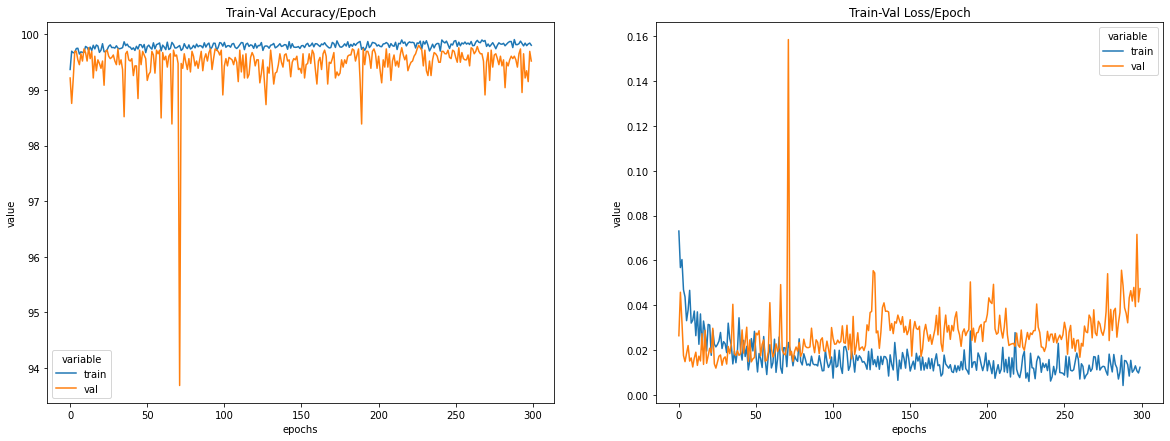

In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

## References
- https://www.kaggle.com/code/ekrembayar/a-b-testing-step-by-step-hypothesis-testing
- https://medium.com/analytics-vidhya/augment-your-data-easily-with-pytorch-313f5808fc8b
- https://www.kaggle.com/code/ryanholbrook/mutual-information
